In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

In [32]:
warnings.filterwarnings('ignore')

**Задание**

Цель: применить на практике базовые ансамблевые методы

Описание задания:
В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)
Этапы работы:

1.Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

2.Подготовьте датасет к обучению моделей.
a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html, 
preprocessing.LabelEncoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. 
Старайтесь не использовать для этой задачи циклы.
b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

3.Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

4.Обучите дерево решений на обучающем множестве. Используйте следующие модели:
a) tree.DecisionTreeClassifier https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
b) ensemble.RandomForestClassifier https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

5.Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

6.Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

7.Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
a) Повторите п. 5

8.Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html. Используйте ensemble.StackingClassifier.https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html 
a) Повторите п. 5

9.Сформулируйте выводы по проделанной работе.
a) Сравните метрики построенных моделей.
b) Напишите свое мнение, какая модель наилучшая и почему.

Для получения зачета по этому домашнему заданию, минимально, должны быть обучены следующие модели: дерево решений, стекинг трех моделей. В данных должны быть обработаны категориальные значения.

Результат: получены знания по использованию базовых ансамблевых методов.

**Форма выполнения**:
* ссылка на Jupyter Notebook, загруженный на GitHub
* ссылка на Google Colab
* файл с расширением .ipynb

**Инструменты**:
* Jupyter Notebook/Google Colab;
* GitHub.
* данные с сайта https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
pd.get_dummies, preprocessing.LabelEncoder
модели tree.DecisionTreeClassifier https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html и ensemble.RandomForestClassifier https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
metrics.classification_report https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
ensemble.BaggingClassifier https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
svm.LinearSVC https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
ensemble.StackingClassifier https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html


**Рекомендации к выполнению**:

* Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
* У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
* Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
* Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

# 1.Загрузка данных

In [12]:
df = pd.read_csv('../Sources/heart.csv', sep=',')

### Контекст данных

Сердечно-сосудистые заболевания (ССЗ) являются причиной смерти номер 1 во всем мире, ежегодно унося, по оценкам, 17,9 миллиона жизней, что составляет 31% всех смертей во всем мире. Четыре из 5 смертей от ССЗ происходят из-за сердечных приступов и инсультов, и одна треть этих смертей происходит преждевременно у людей в возрасте до 70 лет. Сердечная недостаточность является распространенным заболеванием, вызванным ССЗ, и этот набор данных содержит 12 признаков, которые можно использовать для прогнозирования возможного сердечного заболевания.

### Описание датасета

Статистические данные о группах домов в Калифорнии, основанные на переписи 1990 года.   


**age**: age of person - возраст пациента [годы]

**Sex**: Male or Female - пол пациента [M: мужчина, F: женщина]

**ChestPinType** : any pain in the area of your chest - тип боли в груди

**ASY** = Asymptomatic - бесимптомная

**NAP** = Non Anginal pain - неангинальная боль

**ATA** = Atypical Angina - атипичная стенокардия

**TA** = Typical Angina - типичная стенокардия

**Restin BP** : Resting Blood Pressure (Hypertension) - артериальное давление в состоянии покоя [мм рт. ст.]

**Cholesterol** : Cholesterol level in the blood - уровень холестерина в крови 

**fasting BS** : A fasting blood sugar (FBS) level is the result of a blood sample taken after a patient fasts for at least eight hours, 1 = if FastingBS > 120 mg/dl, 0 = otherwise - Уровень сахара в крови натощак [1: если уровень сахара в крови натощак> 120 мг / дл, 0: в противном случае]


**Resting ECG**:is a non-invasive test that can detect abnormalities including arrhythmias, evidence of coronary heart disease, left ventricular hypertrophy and bundle branch blocks - это неинвазивный тест, который может выявить аномалии, включая аритмии, признаки ишемической болезни сердца, гипертрофию левого желудочка и блокаду ножек пучка Гиса.


**MaxHR** : Maximum Heart Rate - достигнутая максимальная частота сердечных сокращений [числовое значение от 60 до 202]

**ExerciseAngina** : If person do angina exercise or not, Y = Yes, N = No - Стенокардия, вызванная физической нагрузкой [Y: Да, N: Нет]

**Oldpeak**: ST depression induced by exercise relative to rest - ST числовое значение, измеренное в депрессии

**ST_Slope** : The ST segment shift relative to exercise-induced increments in heart rate - наклон сегмента ST при максимальной нагрузке [Вверх: наклон вверх, плоский: плоский, вниз: наклон вниз]

**HeartDisease** : output class - выходной класс 1: болезнь сердца, 0: норма


In [13]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [14]:
group = df.groupby(by='HeartDisease')

In [15]:
group.get_group(1).head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
1    49   F           NAP        160          180          0     Normal   
3    48   F           ASY        138          214          0     Normal   
8    37   M           ASY        140          207          0     Normal   
11   58   M           ATA        136          164          0         ST   
13   49   M           ASY        140          234          0     Normal   

    MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
1     156              N      1.0     Flat             1  
3     108              Y      1.5     Flat             1  
8     130              Y      1.5     Flat             1  
11     99              Y      2.0     Flat             1  
13    140              Y      1.0     Flat             1

In [16]:
df.shape

(918, 12)

In [17]:
colors = ["#1984c5", "#22a7f0", "#63bff0", "#a7d5ed", "#e2e2e2", "#e1a692", "#de6e56", "#e14b31", "#c23728"]

In [18]:
df = raw_data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [19]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [20]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [21]:
df.describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

In [22]:
df.describe(include='object')

Sex ChestPainType RestingECG ExerciseAngina ST_Slope
count   918           918        918            918      918
unique    2             4          3              2        3
top       M           ASY     Normal              N     Flat
freq    725           496        552            547      460

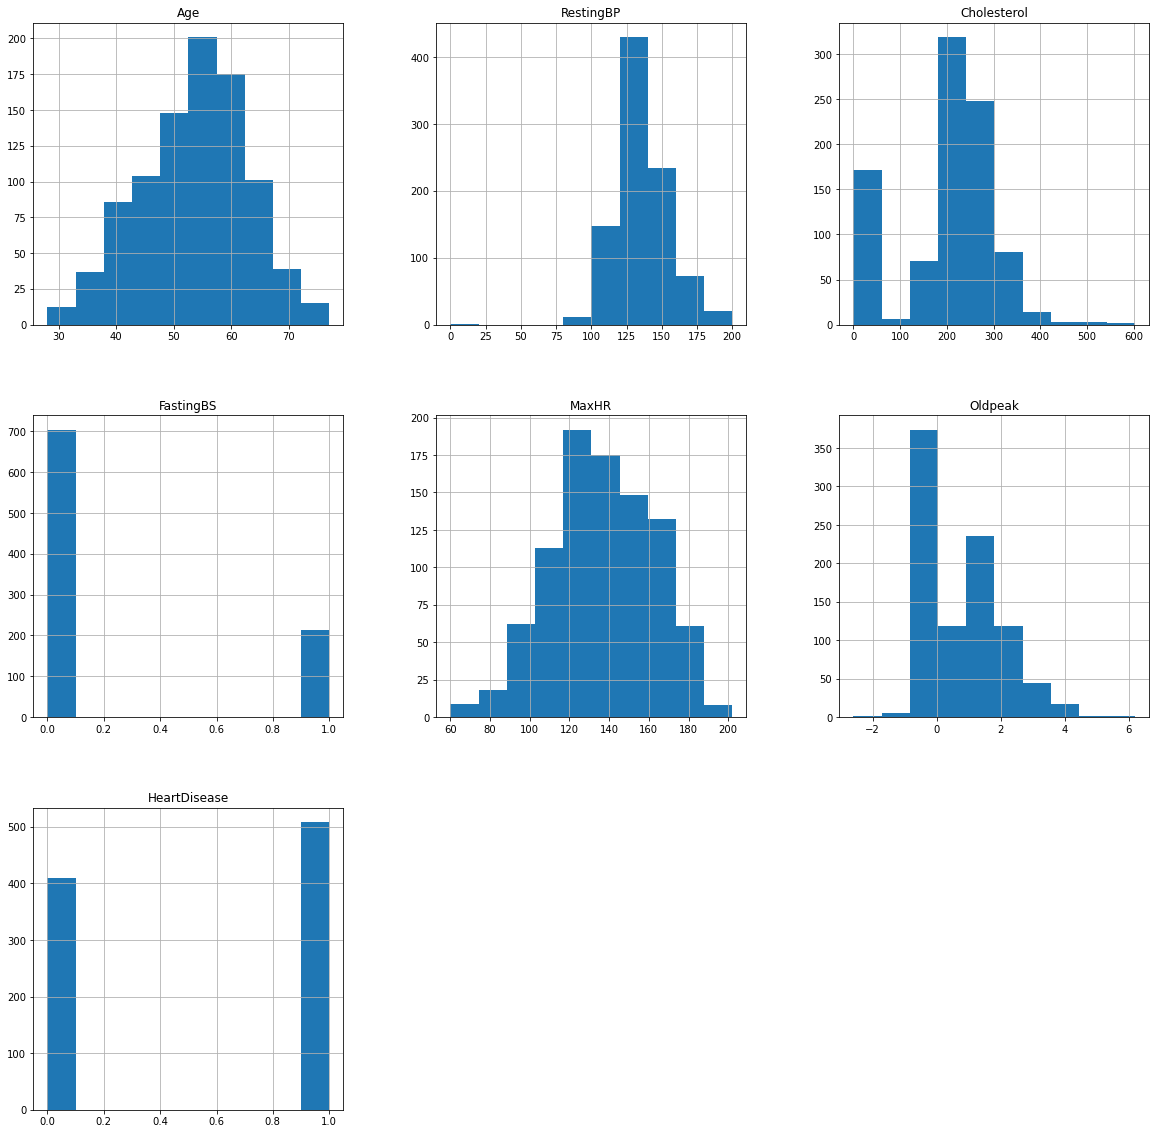

In [23]:
# Посмотрим на распределение признаков

df.hist(figsize=(20,20))
plt.show()

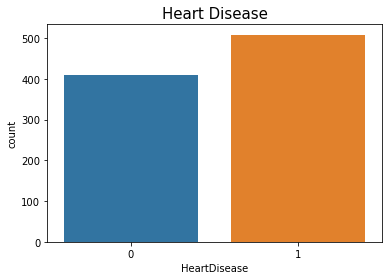

In [33]:
sns.countplot(df["HeartDisease"])
plt.title("Heart Disease",size = 15)
plt.show()

Видим, что у нас наблюдается дизбаланс между классами, выборка перекошена в сторону пациентов, имеющих болезнь с сердцем.

In [39]:
# Shows the Distribution of Heat Diseases with respect to male and female
fig=px.histogram(df, 
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

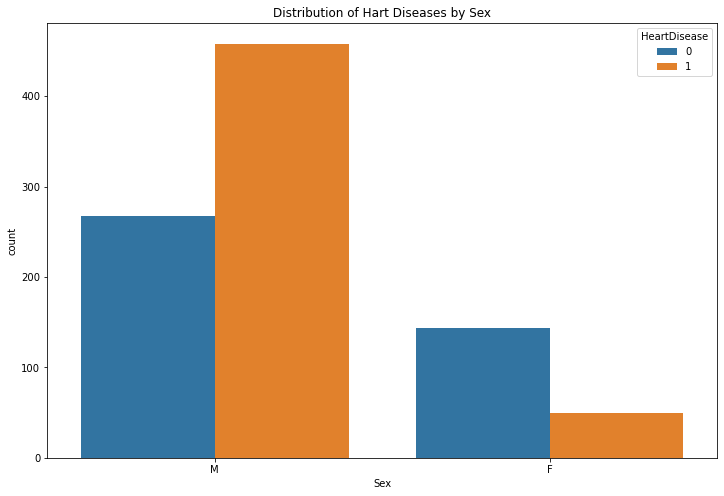

In [61]:
plt.figure(figsize=(12,8))
sns.countplot(
            df['Sex'], 
            hue=df["HeartDisease"])
plt.title('Distribution of Hart Diseases by Sex');

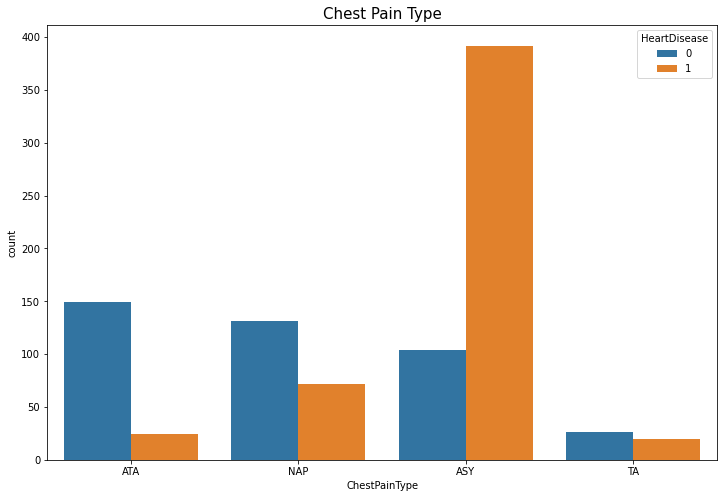

In [35]:
plt.figure(figsize= (12,8))
sns.countplot(df["ChestPainType"], hue= df["HeartDisease"])
plt.title("Chest Pain Type",size = 15)
plt.show()

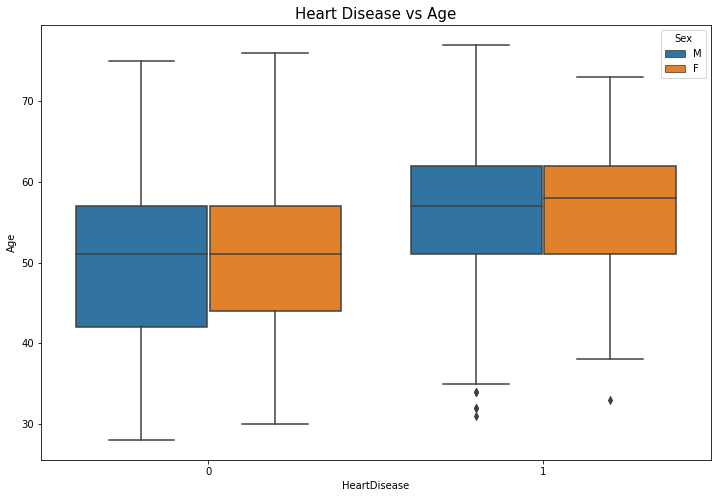

In [85]:
plt.figure(figsize= (12,8))
sns.boxplot(x= df["HeartDisease"], y= df["Age"], hue=df['Sex'])
plt.title("Heart Disease vs Age",size = 15)
plt.show()

In [81]:
fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

In [82]:
fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age", color='Sex')
fig.show()

In [77]:
fig = px.box(df,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP")
fig.show()

In [79]:
fig = px.box(df,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP", color="Sex") 
fig.show()

In [86]:
fig = px.box(df,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol")
fig.show()

In [92]:
fig = px.box(df,y="Oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak")
fig.show()

In [94]:
fig = px.box(df,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR - максимальная частота сокращений сердца")
fig.show()

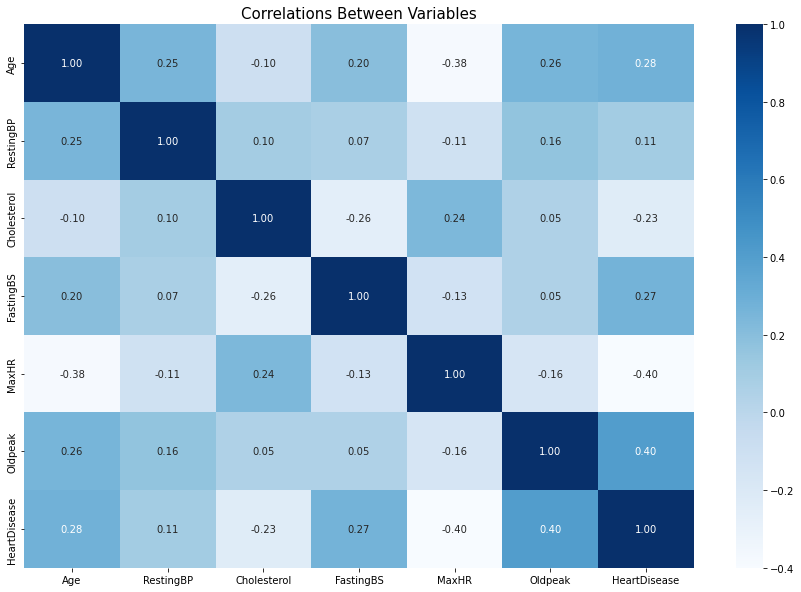

In [27]:
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(), annot= True, fmt= ".2f", cmap="Blues")
plt.title("Correlations Between Variables",size = 15)
plt.show()

In [28]:
a=df.corr()
a.style.background_gradient(cmap="Greens_r")

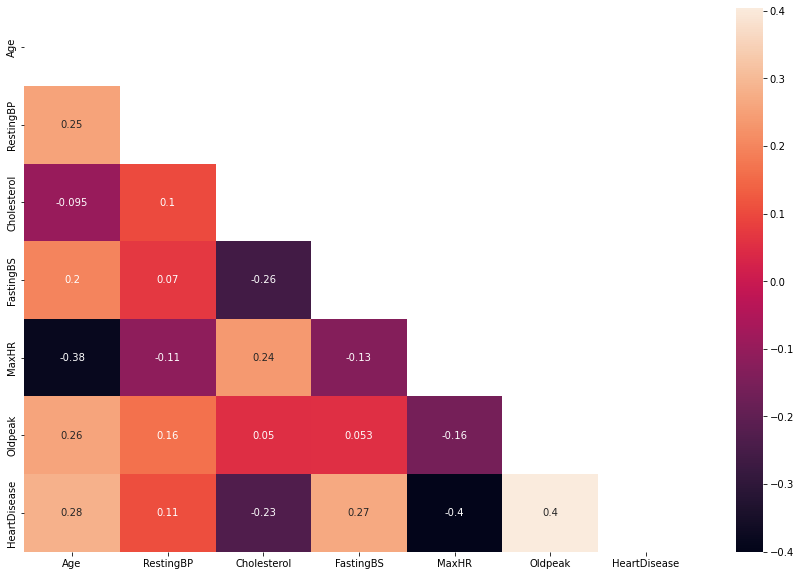

In [29]:
corr=df.corr()
mask=np.triu(corr)

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,mask=mask);

<Figure size 1440x720 with 0 Axes>

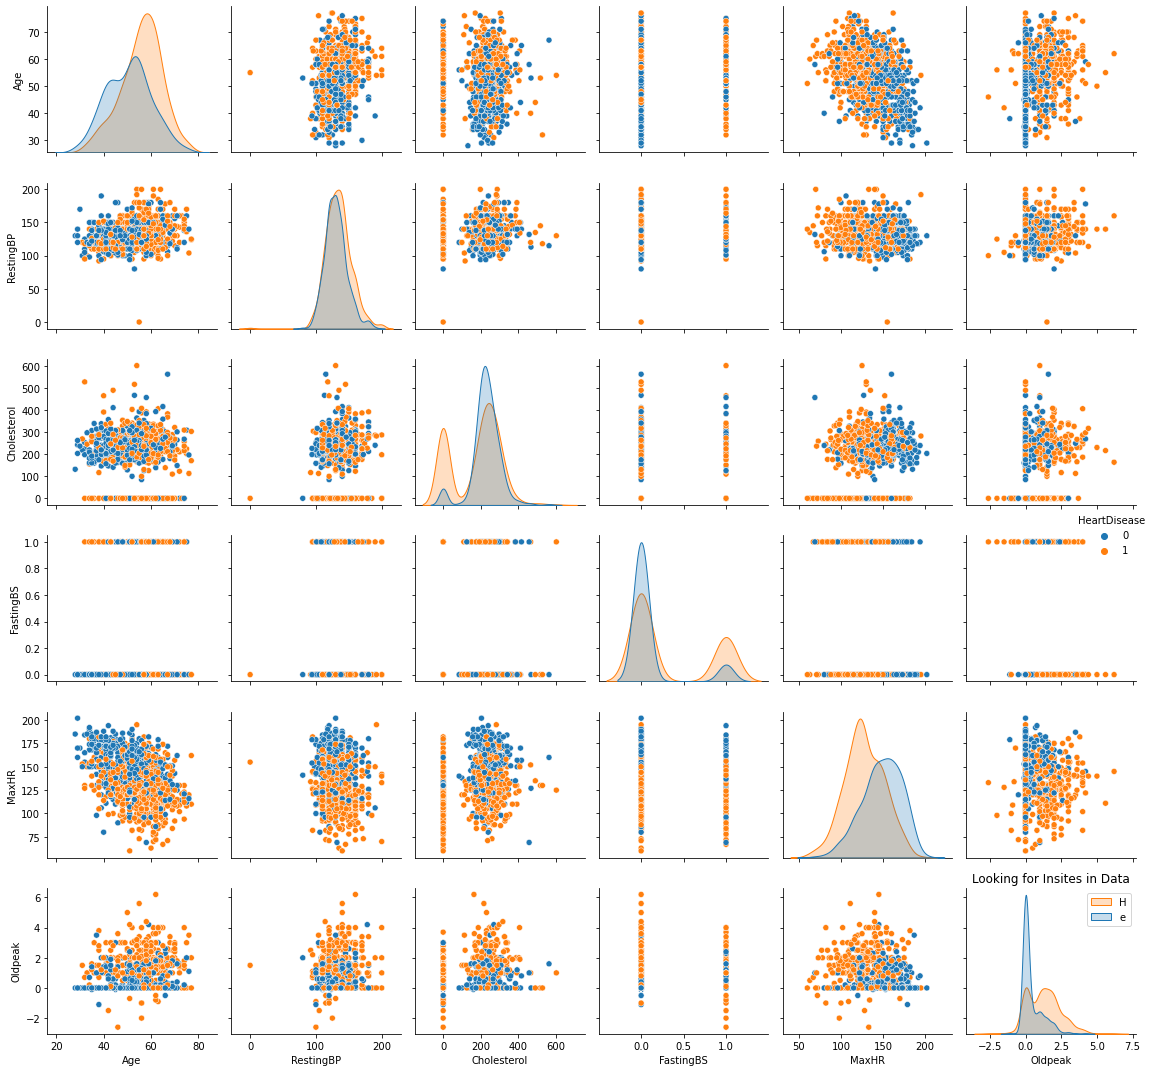

In [64]:
plt.figure(figsize=(20,10))
sns.pairplot(df, hue='HeartDisease')
plt.title('Looking for Insites in Data')
plt.legend('HeartDisease')
plt.tight_layout()
plt.plot();

In [115]:
axs[0]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [138]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

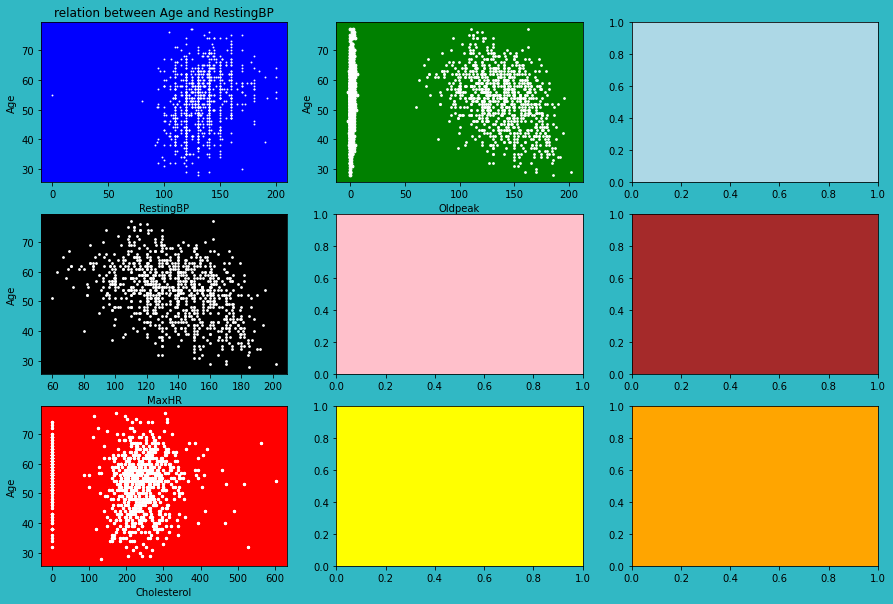

In [173]:
# figure - это область нашей фигуры (как шахматная доска 3 на 3); axs - это plots - аналог шахматных клеток. 
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10)) 
fig.set_facecolor('#31b8c4')

axs[0, 0].scatter(df.RestingBP, df.Age, color='white', s=0.8)
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_xlabel('RestingBP')

axs[0, 0].set_ylabel('Age')
axs[0, 0].set_xlabel('RestingBP')

axs[0, 0].set_title('relation between Age and RestingBP')


axs[2, 0].scatter(df.Cholesterol, df.Age, color='white', s=5)
axs[2, 0].set_xlabel('Age')
axs[2, 0].set_xlabel('Cholesterol')


axs[2, 0].scatter(df.Cholesterol, df.Age, color='white', s=5)
axs[2, 0].set_ylabel('Age')
axs[2, 0].set_xlabel('Cholesterol')

axs[1, 0].scatter(df.MaxHR, df.Age, color='white', s=3)
axs[1, 0].set_ylabel('Age')
axs[1, 0].set_xlabel('MaxHR')

axs[0, 1].scatter(df.Oldpeak, df.Age, color='white', s=8)
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_xlabel('Oldpeak')

axs[0, 1].scatter(df.MaxHR, df.Age, color='white', s=3)
axs[0, 1].set_ylabel('Age')
axs[0, 1].set_xlabel('Oldpeak')


# Раскраска Plot-ов
axs[0, 0].set_facecolor('blue')
axs[0, 1].set_facecolor('green')
axs[0, 2].set_facecolor('lightblue')
axs[1, 0].set_facecolor('black')
axs[1, 1].set_facecolor('pink')
axs[1, 2].set_facecolor('brown')
axs[2, 0].set_facecolor('red')
axs[2, 1].set_facecolor('yellow')
axs[2, 2].set_facecolor('orange')
# # ax2.set_facecolor

In [174]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [177]:
for i,col in enumerate(df.columns, 1):
    print(i, col)

1 Age
2 Sex
3 ChestPainType
4 RestingBP
5 Cholesterol
6 FastingBS
7 RestingECG
8 MaxHR
9 ExerciseAngina
10 Oldpeak
11 ST_Slope
12 HeartDisease


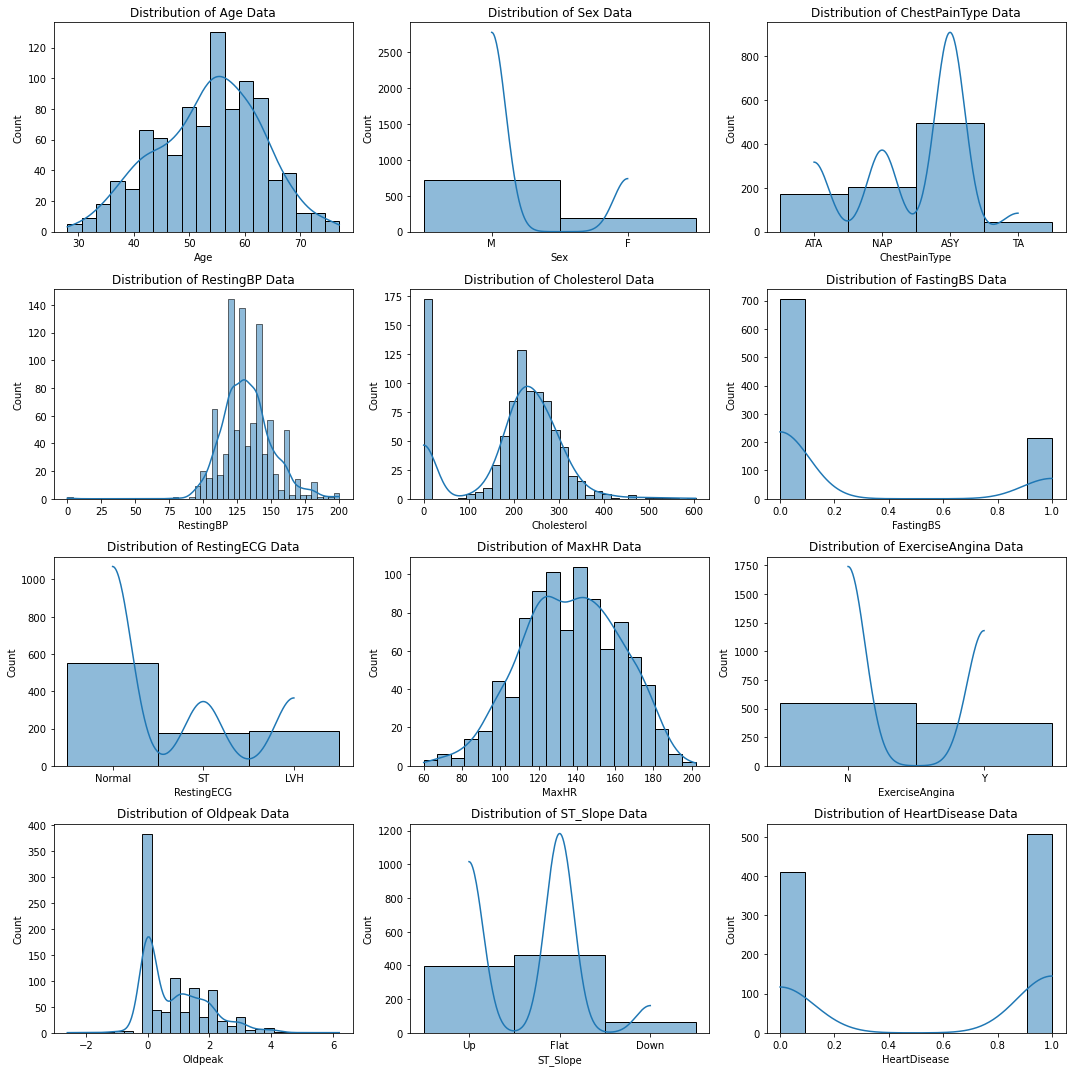

In [179]:
plt.figure(figsize=(15,15))

for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()
    

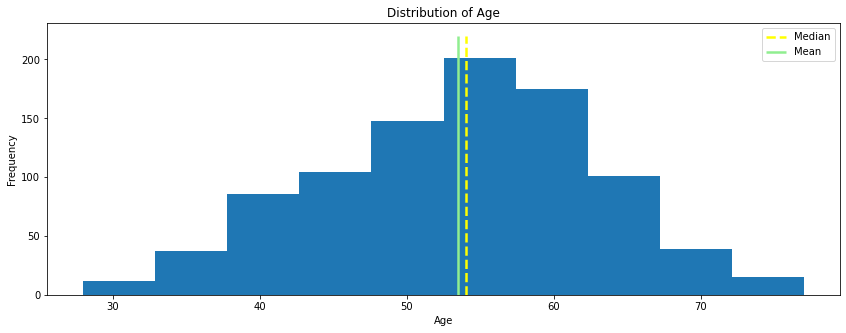

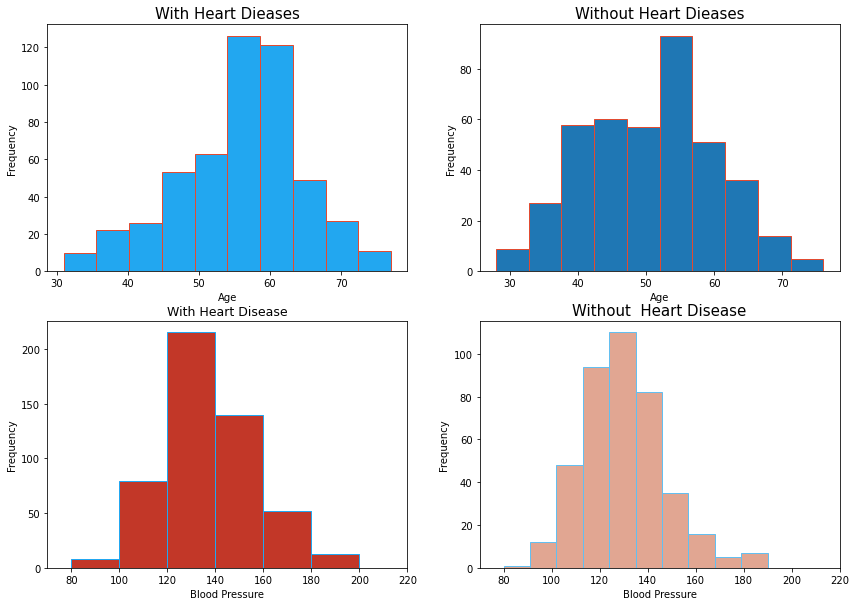

In [190]:
age_median = df.Age.median()
age_mean = df.Age.mean()

group = df.groupby(by='HeartDisease')
heart_disease = group.get_group(1)
without_heart_disease = group.get_group(0)

plt.figure(figsize=(14.2, 5))
plt.hist(df.Age)
plt.vlines(age_median, ymin=0, ymax=220, color='yellow', ls='--', lw=2.5, label='Median')
plt.vlines(age_mean, ymin=0, ymax=220, lw=2.5, color='lightgreen', label='Mean')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.legend()



fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14.2,10))

ax1 = heart_disease['Age'].plot(kind='hist', ax=axs[0, 0],  ec=colors[7], color=colors[1])
ax1.set_title('With Heart Dieases', size = 15)
ax1.set_xlabel('Age')

ax2 = without_heart_disease['Age'].plot(kind='hist', ec=colors[7],ax=axs[0, 1])
ax2.set_title('Without Heart Dieases', size = 15)
ax2.set_xlabel('Age')

ax3 = heart_disease['RestingBP'].plot(kind='hist', ax=axs[1, 0], ec=colors[1], color=colors[-1])
ax3.set_title('With Heart Disease', size=12.5)
ax3.set_xlabel('Blood Pressure')
ax3.set_xlim(70, 220)

ax4 = without_heart_disease['RestingBP'].plot(kind='hist', ax=axs[1, 1], ec=colors[2], color=colors[5])
ax4.set_title('Without  Heart Disease', size=15)
ax4.set_xlabel('Blood Pressure')
ax4.set_xlim(70, 220)
# fig.suptitle('Distribution of Resting BP by Heart Disease', size=13, c='#000')


plt.show()

In [ ]:
df

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bins_names = ['0-10', '10-20',  '20-30', '40-50' '50-60', '60-70', '70-80', '80-90', '90-100', '100 +']
df['age_bin'] = pd.cut(df['Age'], bins=bins)

In [ ]:
df.head()

In [ ]:
df_age = pd.crosstab(df['age_bin'], df.HeartDisease, normalize='index')
df_age

In [ ]:
df_age.plot(kind='bar', figsize=(15, 5));

In [ ]:
df.groupby('ChestPainType')['HeartDisease'].sum().plot(kind='pie',figsize=(8, 8));

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
from collections import Counter
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline
init_notebook_mode(connected= True)

In [ ]:
fig=px.pie(df,
           names=['Positive','Negative'],
           values=df['HeartDisease'].value_counts(),hole=0.5,
           title="<b>Precentage of Positive and Negative ",
           template='plotly',
           color_discrete_sequence=px.colors.qualitative.Pastel
          )
#            color_discrete_sequence=px.colors.qualitative.Pastel)

# fig.update_layout(title_font_size=25)
fig.show()

In [ ]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.stripplot(y="Age", x ="HeartDisease", data = df);

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

le = LabelEncoder()

df["Sex"] = le.fit_transform(df["Sex"])

In [ ]:
df.head()

In [ ]:
df.Sex.value_counts()

In [ ]:
chest_le = LabelEncoder()
df["ChestPainType"] = chest_le.fit_transform(df["ChestPainType"])

In [254]:
chest_le

LabelEncoder()